In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [2]:
df  = pd.read_csv("Crime_Incidents.csv")
df.head()

C:\Users\Gautam\AppData\Local\Temp\ipykernel_4356\2502358527.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df  = pd.read_csv("Crime_Incidents.csv")


,FILE NUMBER,OFFENSE DATE,OFFENSE TIME,CRIME,COMMITTED,OFFENSE,OFFENSE DESCRIPTION,FULL ADDRESS,ADDRESS NUMBER,STREET DIRECTION,...,CITY,STATE,ZIP CODE,DISTRICT,ZONE,SUBZONE,COMPLETE DISTRICT,COUNCIL DISTRICT,CRIME PREVENTION DISTRICT,GEOLOCATION
0,NaN,04-11-2020,1645,SEXUAL ASSAULT,COMMITTED,14:43.1,BATT/SEXUAL,NaN,NaN,NaN,...,NaN,NaN,70802.0,2,C,1,2C1,10.0,NONE,NaN
1,NaN,10/28/2019,2248,JUVENILE,COMMITTED,0.639583333,IND BEHAVIOR W/JUV,NaN,NaN,NaN,...,NaN,NaN,70807.0,4,B,3,4B3,2.0,NONE,NaN
2,NaN,11-05-2019,537,SEXUAL ASSAULT,COMMITTED,14:43.1,BATT/SEXUAL,NaN,NaN,NaN,...,NaN,NaN,70802.0,1,A,1,1A1,10.0,NONE,NaN
3,NaN,11-09-2019,2345,SEXUAL ASSAULT,ATTEMPTED,14:42.1/B,RAPE/ATT FORCIBLE,NaN,NaN,NaN,...,NaN,NaN,70816.0,3,E,5,3.00E+05,8.0,NONE,NaN
4,NaN,03/14/2020,1657,JUVENILE,COMMITTED,0.639583333,IND BEHAVIOR W/JUV,NaN,NaN,NaN,...,NaN,NaN,70805.0,NaN,NaN,NaN,NaN,7.0,NONE,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490578 entries, 0 to 490577
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   FILE NUMBER                483265 non-null  float64
 1   OFFENSE DATE               490578 non-null  object 
 2   OFFENSE TIME               490578 non-null  object 
 3   CRIME                      490578 non-null  object 
 4   COMMITTED                  490578 non-null  object 
 5   OFFENSE                    490578 non-null  object 
 6   OFFENSE DESCRIPTION        490578 non-null  object 
 7   FULL ADDRESS               483265 non-null  object 
 8   ADDRESS NUMBER             482448 non-null  float64
 9   STREET DIRECTION           80244 non-null   object 
 10  STREET NAME                483265 non-null  object 
 11  STREET TYPE                466665 non-null  object 
 12  CITY                       483265 non-null  object 
 13  STATE                      48

# Data Preprocessing

<b> Missing Values

In [4]:
def missing_value_describe(data):
    # check missing values in training data
    missing_value_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_stats > 0)
    missing_value_stats = missing_value_stats.sort_values(ascending=False)[:missing_value_col_count]
    print("Number of columns with missing values:", missing_value_col_count)
    if missing_value_col_count != 0:
        # print out column names with missing value percentage
        print("\nMissing percentage (desceding):")
        print(missing_value_stats)
    else:
        print("No misisng data!!!")
        
missing_value_describe(df)




Number of columns with missing values: 16

Missing percentage (desceding):
STREET DIRECTION             83.642968
STREET TYPE                   4.874454
COMPLETE DISTRICT             4.713216
SUBZONE                       4.713216
ZONE                          4.713216
DISTRICT                      4.713216
ADDRESS NUMBER                1.657229
STREET NAME                   1.490691
STATE                         1.490691
CITY                          1.490691
FILE NUMBER                   1.490691
FULL ADDRESS                  1.490691
GEOLOCATION                   1.490691
COUNCIL DISTRICT              0.675734
CRIME PREVENTION DISTRICT     0.673695
ZIP CODE                      0.621104
dtype: float64


### The missing percentage of STREET TYPE, COMPLETE DISTRICT, SUBZONE and ZONE columns are the same. That makes sense because they are recorded together. Similary in case of STREET NAME, STATE, CITY, FULL ADDRESS and GEOLOCATION. About 84 % of data is missing in street direction column. So we can drop this column 

In [5]:
df.drop(columns = 'STREET DIRECTION',axis =1,inplace = True)

<b> Checking for duplicate values and dropping them.

In [6]:
df.duplicated().sum()

10

In [7]:
df =df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

<b>Convert the data in the date column to datetime object

In [11]:
df['OFFENSE DATE'] = pd.to_datetime(df['OFFENSE DATE'])


#  Dimension of dataset

In [13]:
df.shape

(490568, 21)

## We have over 490K rows and 21 columns in our dataset. <b>

# Distribution of Committed and Attempted Crimes

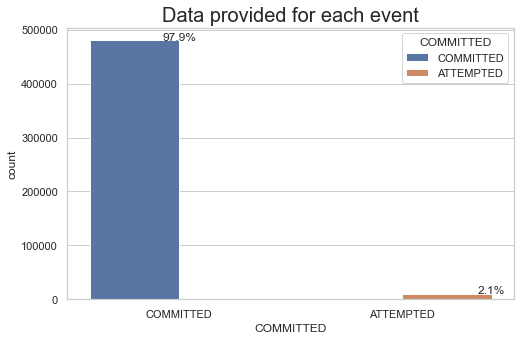

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="COMMITTED", hue="COMMITTED", data=df)
plt.title('Data provided for each event', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()


### About 98 % crimes in our dataset are committed crimes and rest of them attempted.

# Distribution of each type of crime

In [15]:
df['CRIME'].value_counts()

OTHER                          131938
THEFT                          104630
BATTERY                         43318
NARCOTICS                       43245
CRIMINAL DAMAGE TO PROPERTY     37737
VEHICLE BURGLARY                26533
ASSAULT                         20627
FIREARM                         16739
RESIDENTIAL BURGLARY            16194
NON-RESIDENTIAL BURGLARY        16085
NUISANCE                        11927
INDIVIDUAL ROBBERY               7293
JUVENILE                         5084
HOMICIDE                         4085
SEXUAL ASSAULT                   2229
VICE                             1917
BUSINESS ROBBERY                  987
Name: CRIME, dtype: int64

C:\Users\Gautam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'OTHER'),
 Text(1, 0, 'THEFT'),
 Text(2, 0, 'BATTERY'),
 Text(3, 0, 'NARCOTICS'),
 Text(4, 0, 'CRIMINAL DAMAGE TO PROPERTY'),
 Text(5, 0, 'VEHICLE BURGLARY'),
 Text(6, 0, 'ASSAULT'),
 Text(7, 0, 'FIREARM'),
 Text(8, 0, 'RESIDENTIAL BURGLARY'),
 Text(9, 0, 'NON-RESIDENTIAL BURGLARY'),
 Text(10, 0, 'NUISANCE'),
 Text(11, 0, 'INDIVIDUAL ROBBERY'),
 Text(12, 0, 'JUVENILE'),
 Text(13, 0, 'HOMICIDE'),
 Text(14, 0, 'SEXUAL ASSAULT'),
 Text(15, 0, 'VICE'),
 Text(16, 0, 'BUSINESS ROBBERY')]

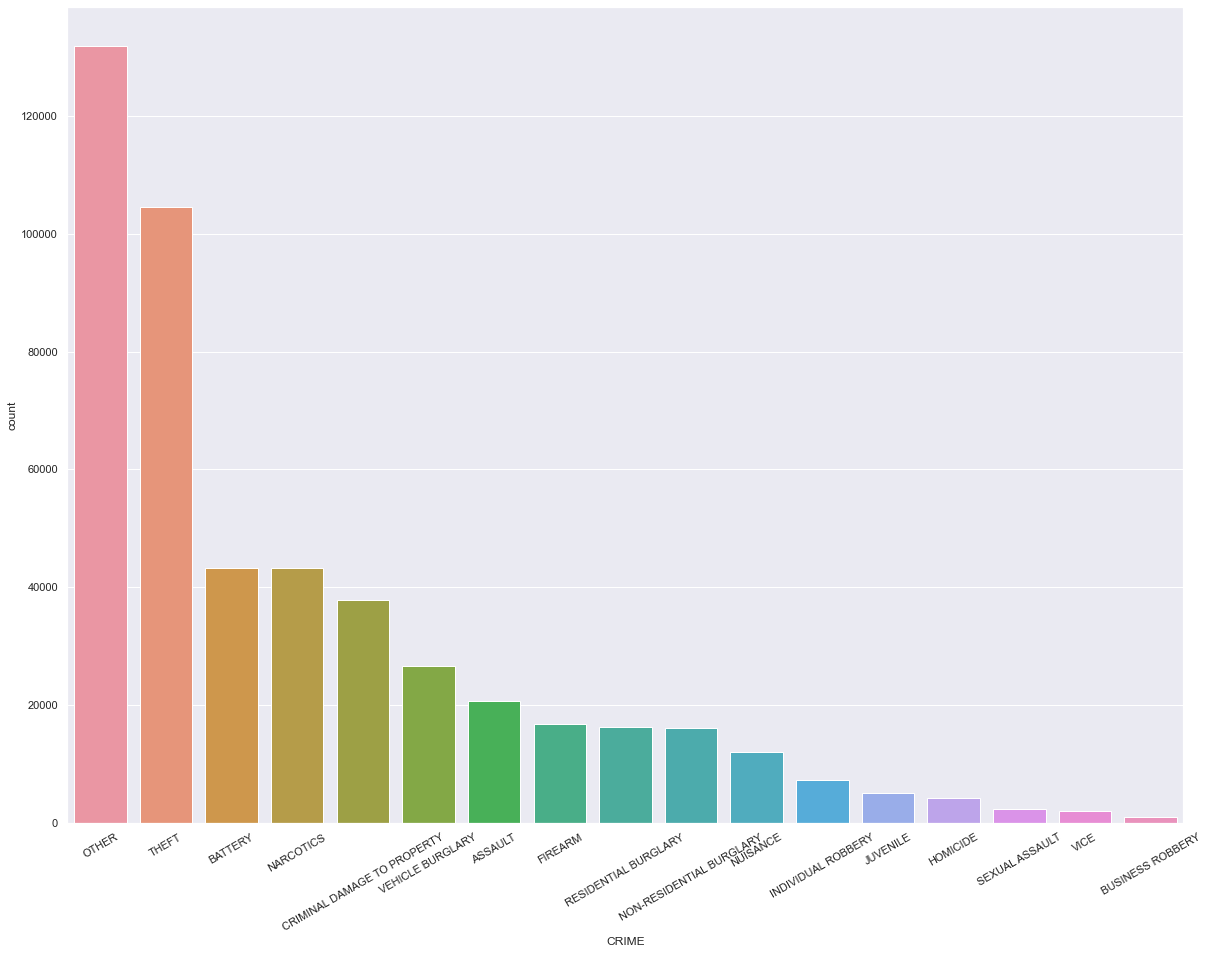

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
ax=sns.countplot(df['CRIME'], order = df['CRIME'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

### It appears that the most common type of is associated with theft in Baton Rouge. People do need to add some sort of theft alarm system in their houses and cars.

# Relationship between crime and date/time

<b>Extracting year, month and day from OFFENSE DATE column and adding them in our dataset.

In [29]:
df['year'] = df['OFFENSE DATE'].dt.year
df['month_num'] = df['OFFENSE DATE'].dt.month
df['month'] = df['OFFENSE DATE'].dt.month_name()
df['day'] = df['OFFENSE DATE'].dt.day
df['day_name'] = df['OFFENSE DATE'].dt.day_name()

In [30]:
df.sample(5)

,FILE NUMBER,OFFENSE DATE,OFFENSE TIME,CRIME,COMMITTED,OFFENSE,OFFENSE DESCRIPTION,FULL ADDRESS,ADDRESS NUMBER,STREET NAME,...,SUBZONE,COMPLETE DISTRICT,COUNCIL DISTRICT,CRIME PREVENTION DISTRICT,GEOLOCATION,year,month_num,month,day,day_name
167403,1.300078e+09,2013-09-07,237,NUISANCE,COMMITTED,0.6875,TRESPASSING ON BREC PARKS,3000 MONTE SANO AV,3000.0,MONTE SANO,...,1,4C1,10.0,NONE,"3000 MONTE SANO AV\nBATON ROUGE, LA 70807\n(30...",2013,9,September,7,Saturday
197575,1.900034e+09,2019-04-19,1215,NUISANCE,COMMITTED,14:03.3,ENT/REM AFTER FORB/CC,5905 FLORIDA BL,5905.0,FLORIDA,...,1,1C1,6.0,NONE,"5905 FLORIDA BL\nBATON ROUGE, LA\n(30.451245, ...",2019,4,April,19,Friday
406043,1.500065e+09,2015-07-08,1400,VEHICLE BURGLARY,COMMITTED,14:62/BD,BURG/AUTO $50 - $200,6224 PLANK RD,6224.0,PLANK,...,1,4F1,5.0,NONE,"6224 PLANK RD\nBATON ROUGE, LA 70805\n(30.5074...",2015,7,July,8,Wednesday
438840,1.900065e+09,2019-07-17,1103,NARCOTICS,COMMITTED,40:966E,POSS MARIJUANA,5657 ST KATHERINE AV,5657.0,ST KATHERINE,...,2,4F2,5.0,NONE,"5657 ST KATHERINE AV\nBATON ROUGE, LA 70805\n(...",2019,7,July,17,Wednesday
364583,1.600021e+09,2016-03-02,1730,BATTERY,COMMITTED,14:35.3,DOMESTIC ABUSE BATT,630 ELMER AV,630.0,ELMER,...,1,4A1,2.0,NONE,"630 ELMER AV\nBATON ROUGE, LA\n(30.538395, -91...",2016,3,March,2,Wednesday


In [31]:
# identify weekends
def isWeekend(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return True
    else:
        return False

# identify seasons
def getSeason(row):
    if row.month == 11 or row.month == 0 or row.month == 1:
        return 'Winter'
    elif row.month == 2 or row.month == 3 or row.month == 4:
        return 'Spring'
    elif row.month == 5 or row.month == 6 or row.month == 7:
        return 'Summer'
    else:
        return 'Fall'

# determine the weekend and season from the 'Date' feature and add them to the data frame
df['Weekend'] = df['OFFENSE DATE'].apply(isWeekend)
df['Season'] = df['OFFENSE DATE'].apply(getSeason)

## Crimes by day of week


Crimes over the weekdays: 352438
Crimes over the weekends: 138130

Percentage of weekend crimes: 28.157156602142823


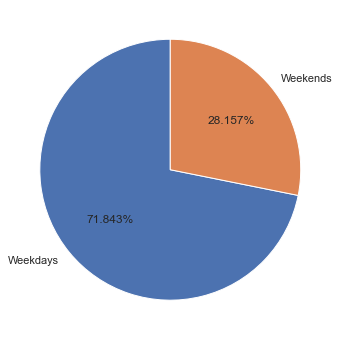

In [32]:
# weekday crimes
weekday_crimes = df['Weekend'].value_counts()[0]
print('Crimes over the weekdays: {}'.format(weekday_crimes))

# weekend crimes
weekend_crimes = df['Weekend'].value_counts()[1]
print('Crimes over the weekends: {}'.format(weekend_crimes))

# percentage of weekend crimes
percentage = (100 * weekend_crimes) / (weekend_crimes + weekday_crimes)
print('\nPercentage of weekend crimes: {}'.format(percentage))

#visualization
plt.pie([weekday_crimes, weekend_crimes], labels = ['Weekdays', 'Weekends'], autopct='%.3f%%',startangle = 90)
plt.show()

### We observe that 28.157% of the total crimes occured over the weekend and the remaining occured during weekdays. This means that about 30% of the total crimes have occured only on the weekends (Saturdays and Sundays).

In [34]:
#Adding an unique identifier in the dataset
df = df.reset_index()
df = df.rename(columns={"index":"ID"})
df['ID'] = df.index + 1

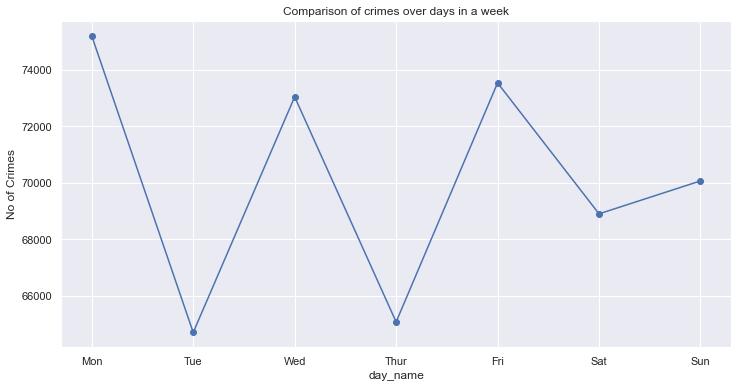

In [35]:
days = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
df.groupby('day_name')['ID'].count().plot(marker='o',label='Crimes')
plt.xticks(np.arange(7),days)
plt.ylabel('No of Crimes')
plt.title("Comparison of crimes over days in a week")
plt.show()

### The graph above shows that  the most number crimes were reported on Monday and least on Tuesday.

# Crimes by season

<AxesSubplot:>

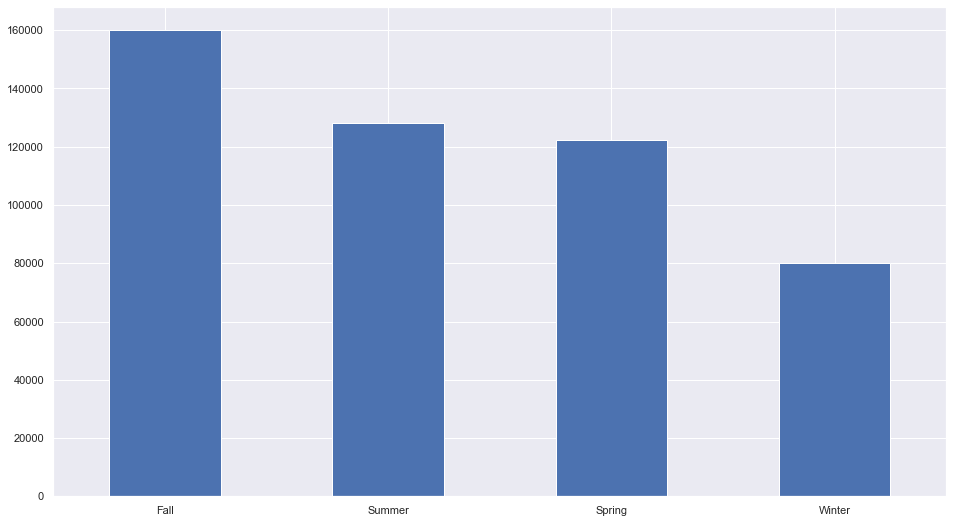

In [33]:
df['Season'].value_counts().plot(kind='bar', figsize=(16, 9), rot = 0)

###  We observe that the number of crimes during winter is less. May be even criminals don't like the extreme winter weather of Baton Rouge. The next lowest number of crimes can be seen during the spring as it is cold too. The number of crimes is very high during the summer and fall which have relatively warm weather.

## Investigating the crime over years

2011    62923
2012    56365
2013    51136
2014    47514
2015    48446
2016    46006
2017    49777
2018    45870
2019    43525
2020    38946
2021       60
Name: year, dtype: int64


<AxesSubplot:title={'center':'Crime over the years'}>

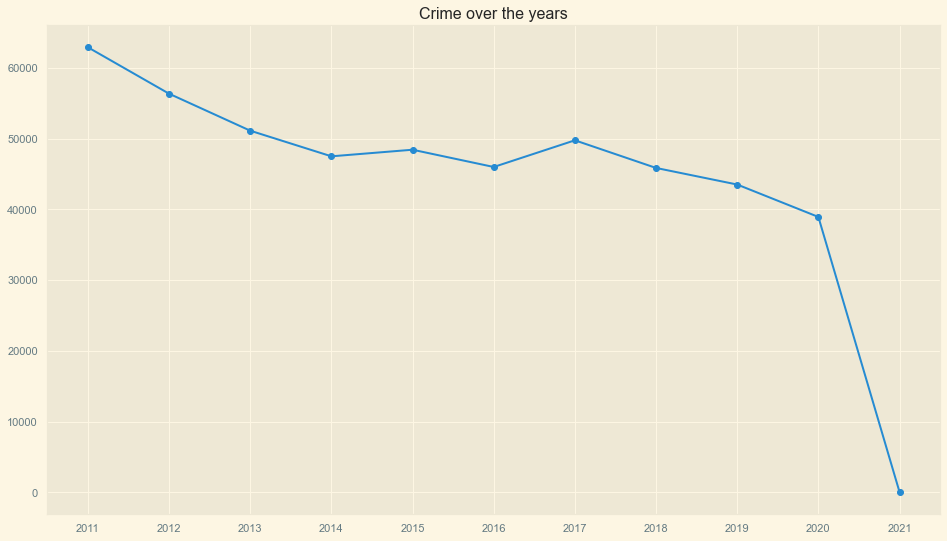

In [117]:
# Getting the crimes for each year
crimes_by_years = df['year'].value_counts()
crimes_by_years.sort_index(ascending = True, inplace = True)

print(crimes_by_years)


years = [y for y in range(2011, 2022)]

# Visualizing the trend
crimes_by_years.plot(x = 'Year', y = 'Crime Count', title = 'Crime over the years', kind = 'line', figsize = (16, 9), xticks= years, marker = 'o')

### There was a huge decrease in the number of reported crimes from 2011 to 2014 and from 2018 to 2020. The highest number of crimes reported was during the year 2011. Since then, crimes decreased every year. In the year 2017, the crimes increased again and later they decreased till 2020. We see a huge decline in 2021 beacuse the data provided contains only 60 entries.

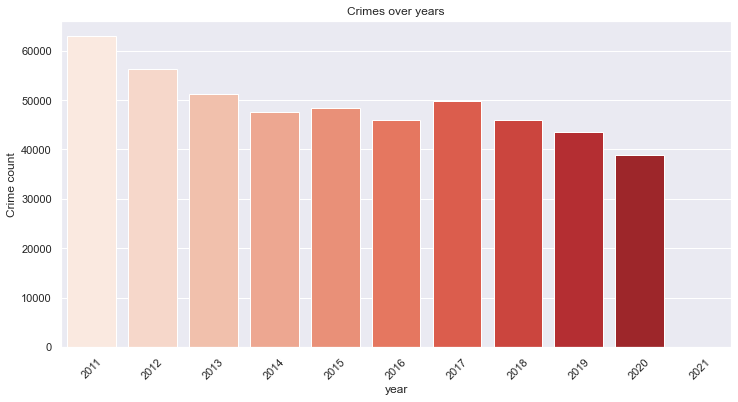

In [38]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='year', data=df, palette='Reds')
plt.ylabel('Crime count')
plt.title('Crimes over years')
plt.xticks(rotation=45)
plt.show()

# Crimes by Region

### Top 15 Addresses in Baton Rouge in Crime


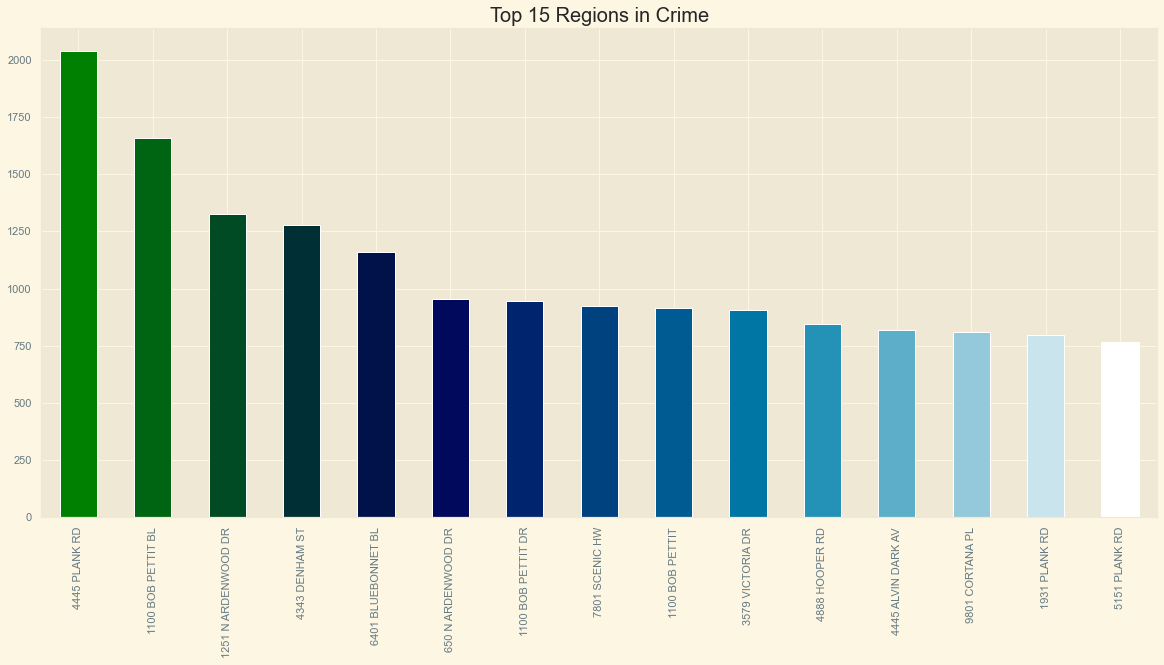

In [39]:
# Regions with count of crimes

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('Solarize_Light2')

color = plt.cm.ocean(np.linspace(0, 1, 15))
df['FULL ADDRESS'].value_counts().head(15).plot.bar(color = color)

plt.title('Top 15 Regions in Crime',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

### 4445 PLANK RD and 1100 BOB PETTIT BL are the places where more than 3600 crimes were reported alone. 

### Top 10 Streets in Baton Rouge in Crime

<AxesSubplot:>

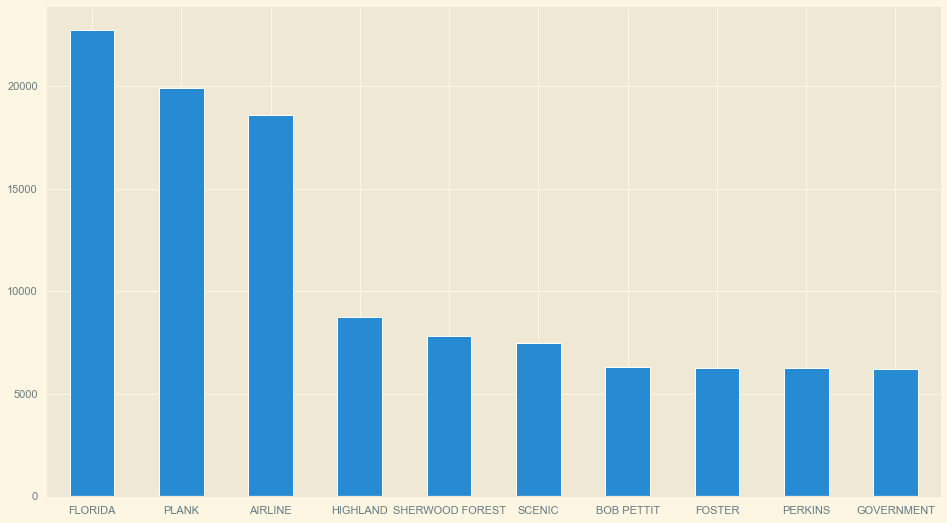

In [40]:
df['STREET NAME'].value_counts().head(10).plot(kind='bar', figsize=(16, 9), rot = 0)

### Top 10 ZIP CODES where crime were reported

<AxesSubplot:>

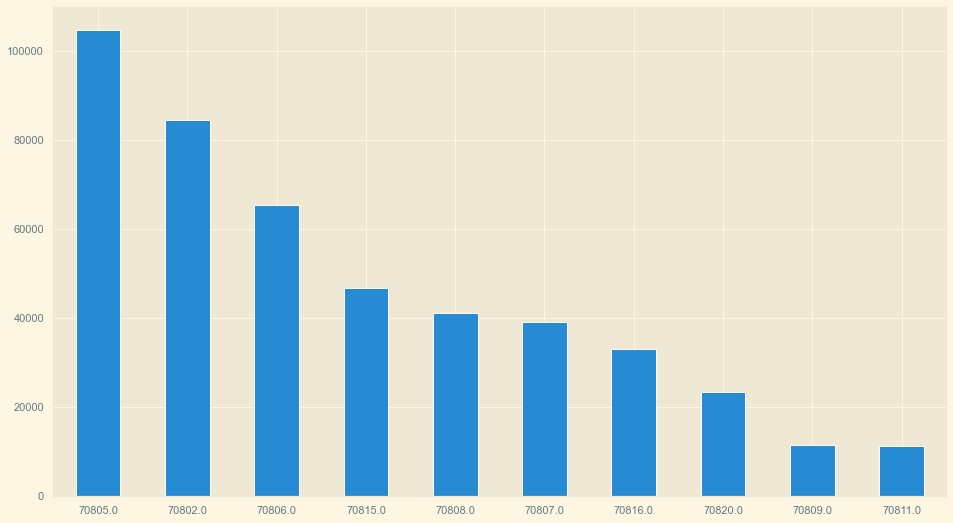

In [41]:
df['ZIP CODE'].value_counts().head(10).plot(kind='bar', figsize=(16, 9), rot = 0)

# Some other interesting insights

## Description of the Crime

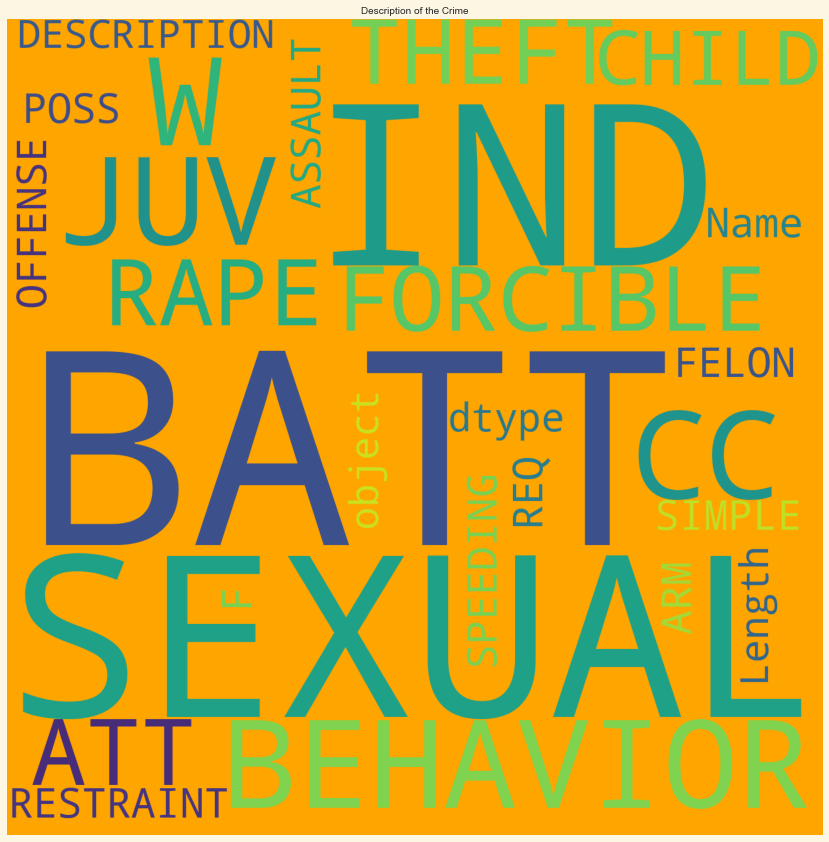

In [42]:
plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fast')


wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(df['OFFENSE DESCRIPTION']))
plt.title('Description of the Crime', fontsize = 10)
plt.imshow(wc)
plt.axis('off')
plt.show()

## Top 10 FILE NUMBER with most numbers of crimes

<AxesSubplot:>

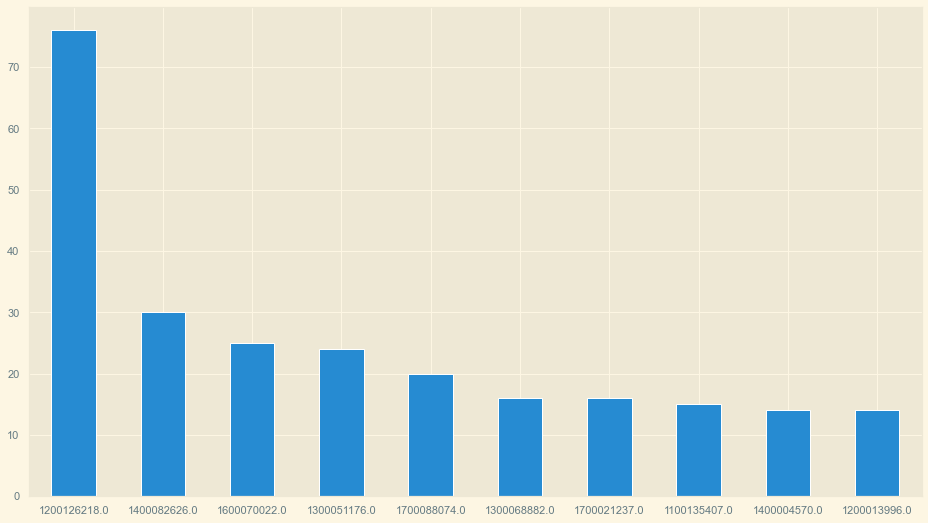

In [44]:
df['FILE NUMBER'].value_counts().head(10).plot(kind='bar', figsize=(16, 9), rot = 0)

## Top 10 categories of theft

<AxesSubplot:>

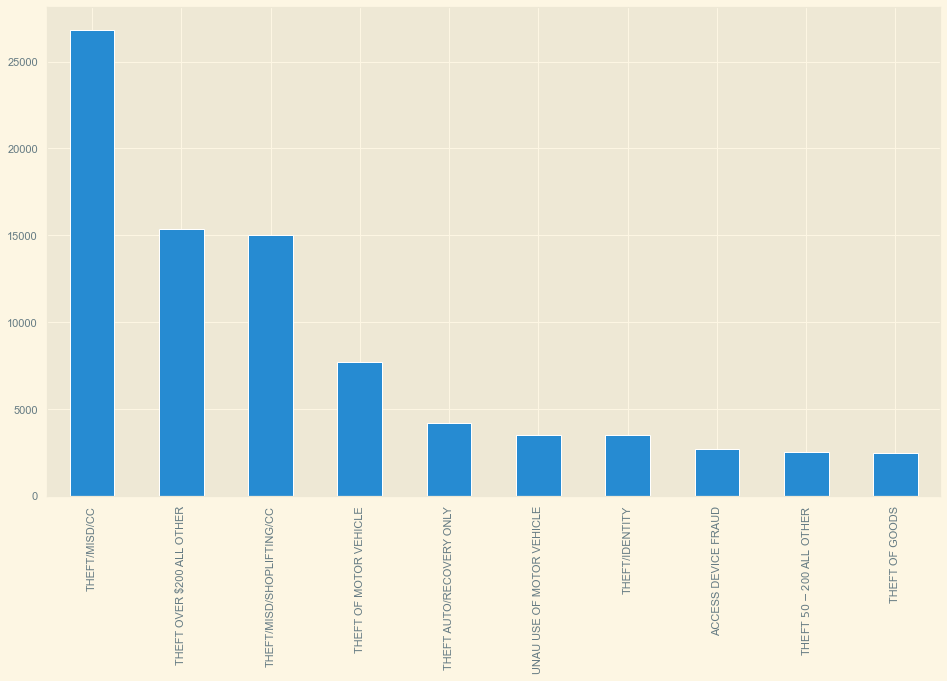

In [45]:
# retrieving all thefts
thefts = df[df['CRIME'] == 'THEFT']

# identifying different categories of theft
thefts_with_categories = thefts['OFFENSE DESCRIPTION'].value_counts().head(10)

# visualization
thefts_with_categories.plot(kind = 'bar', figsize = (16, 9))

### We observe that THEFT OVER 200 DOLLARS , SHOP LIFTING and THEFT OF MOTOR VEHICLE are the most common type of thefts.


## Variation of type of crime with location of crime

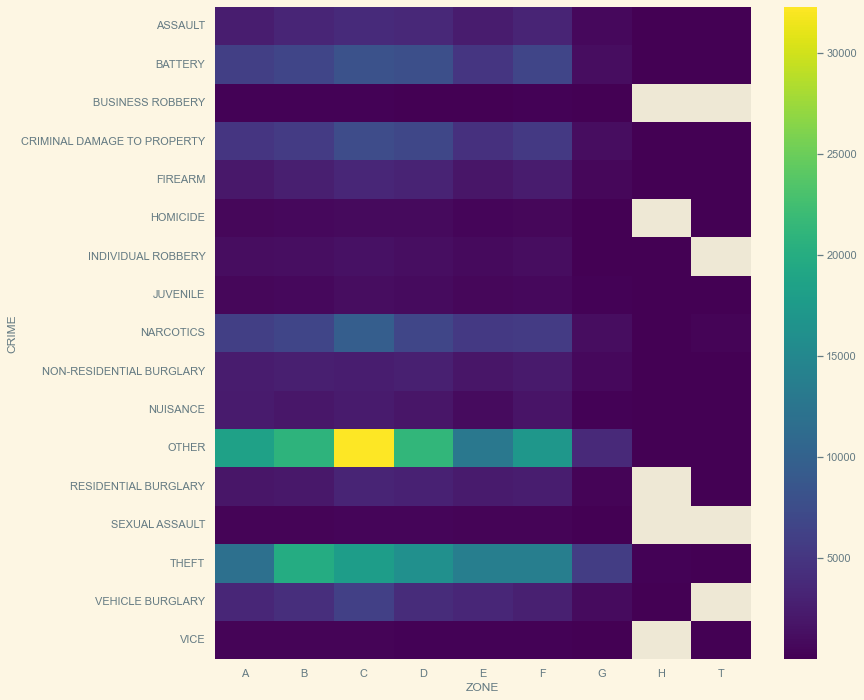

In [47]:
# grouping by crime type and zone
crimes_by_type_and_zone = df.groupby( ['CRIME', 'ZONE'] )
crimes_by_type_and_zone = crimes_by_type_and_zone.count()['ID']

temp = crimes_by_type_and_zone.unstack(level = -1)

# visualization
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(temp, cmap="viridis")

<AxesSubplot:>

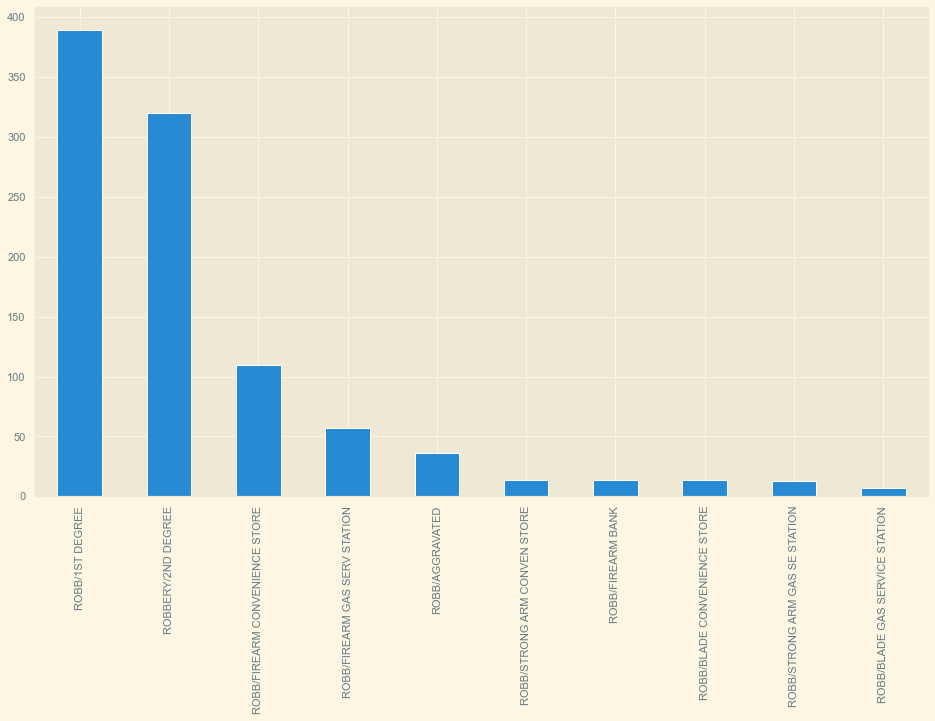

In [51]:
# retrieving all thefts
thefts = df[df['CRIME'] == 'BUSINESS ROBBERY']

# identifying different categories of theft
thefts_with_categories = thefts['OFFENSE DESCRIPTION'].value_counts().head(10)

# visualization
thefts_with_categories.plot(kind = 'bar', figsize = (16, 9))

# Identifying Financial Crimes

Some of the most common financial crimes are:
- Money Laundering
- Embezzelment 
- Bribery
- Fraud

In [78]:
df1 = df[df['OFFENSE DESCRIPTION'].str.contains("MONEY LAUNDERING")]

In [86]:
df2 = df[df['OFFENSE DESCRIPTION'].str.contains("BRIBERY")]

In [93]:
df3 = df[df['OFFENSE DESCRIPTION'].str.contains("EMBEZZLEMENT")]

In [100]:
df4 = df[df['OFFENSE DESCRIPTION'].str.contains("FRAUD")]

In [102]:
financial_crimes = pd.concat([df1, df2, df3, df4, ])

In [104]:
financial_crimes.head()

,ID,FILE NUMBER,OFFENSE DATE,OFFENSE TIME,CRIME,COMMITTED,OFFENSE,OFFENSE DESCRIPTION,FULL ADDRESS,ADDRESS NUMBER,...,COUNCIL DISTRICT,CRIME PREVENTION DISTRICT,GEOLOCATION,year,month_num,month,day,day_name,Weekend,Season
86206,86207,1.100051e+09,2011-05-17,30,OTHER,COMMITTED,0.743055556,MONEY LAUNDERING,1115 BOB PETTIT DR,1115.0,...,12.0,NONE,"1115 BOB PETTIT DR\nBATON ROUGE, LA 70820\n(30...",2011,5,May,17,Tuesday,False,Summer
184035,184036,1.200127e+09,2012-12-14,1500,OTHER,COMMITTED,0.743055556,MONEY LAUNDERING,524 MISTY CREEK DR,524.0,...,12.0,NONE,"524 MISTY CREEK DR\nBATON ROUGE, LA\n(30.36608...",2012,12,December,14,Friday,False,Fall
314702,314703,1.200124e+09,2012-12-07,1500,OTHER,COMMITTED,0.743055556,MONEY LAUNDERING,4640 BLUEBELL DR,4640.0,...,12.0,NONE,"4640 BLUEBELL DR\nBATON ROUGE, LA\n(30.405241,...",2012,12,December,7,Friday,False,Fall
411585,411586,1.100103e+09,2011-09-30,130,OTHER,COMMITTED,0.743055556,MONEY LAUNDERING,500 WEST I12 HW,500.0,...,9.0,NONE,"500 WEST I12 HW\nBATON ROUGE, LA 708017",2011,9,September,30,Friday,False,Fall
433364,433365,1.200124e+09,2013-04-16,1245,OTHER,COMMITTED,0.743055556,MONEY LAUNDERING,2237 S ACADIAN TH,2237.0,...,7.0,NONE,"2237 S ACADIAN TH\nBATON ROUGE, LA 70808\n(30....",2013,4,April,16,Tuesday,False,Spring


In [105]:
financial_crimes.shape

(4275, 29)

### 4275 cases of financial crime were reported in the last 10 year in baton rouge.

# Distribution of each type of financial crime

C:\Users\Gautam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'ACCESS DEVICE FRAUD'),
 Text(1, 0, 'BANK FRAUD'),
 Text(2, 0, 'FRAUD, HOME IMPROVEMENT'),
 Text(3, 0, 'OBTAINING CDS BY FRAUD/FORGERY'),
 Text(4, 0, 'CREDIT CARD FRAUD'),
 Text(5, 0, 'COMPUTER FRAUD'),
 Text(6, 0, 'FRAUDULENT ACQUISITION OF  A CREDIT CARD'),
 Text(7, 0, 'FRAUD'),
 Text(8, 0, 'REFUND FRAUD'),
 Text(9, 0, 'OBTAINING LEGEND DRUG BY FRAUD'),
 Text(10, 0, 'UNLAWFUL PROD,MAN,DIST,POSS, OF FRAUD DOCS, IDENT'),
 Text(11, 0, 'PUBLIC PAYROLL FRAUD'),
 Text(12, 0, 'THEFT BY EMBEZZLEMENT'),
 Text(13, 0, 'INSURANCE FRAUD - HEALTH CARE'),
 Text(14, 0, 'PUBLIC BRIBERY'),
 Text(15, 0, 'PUBLIC CONTRACT FRAUD'),
 Text(16, 0, 'INSURANCE FRAUD - AUTOMOBILE/FELONY'),
 Text(17, 0, 'OBTAINING LEGEND DRUGS BY MISREP OR FRAUD'),
 Text(18, 0, 'THEFT FRAUD ACQU RENTAL AUTO'),
 Text(19, 0, 'MONEY LAUNDERING'),
 Text(20, 0, 'MEDICAID FRAUD'),
 Text(21, 0, 'ARSON W/INTENT TO DEFRAUD'),
 Text(22, 0, 'FRAUD IN OBT ACCOM'),
 Text(23, 0, 'INSURANCE FRAUD'),
 Text(24, 0, 'DAM PROP TO DEFRAU

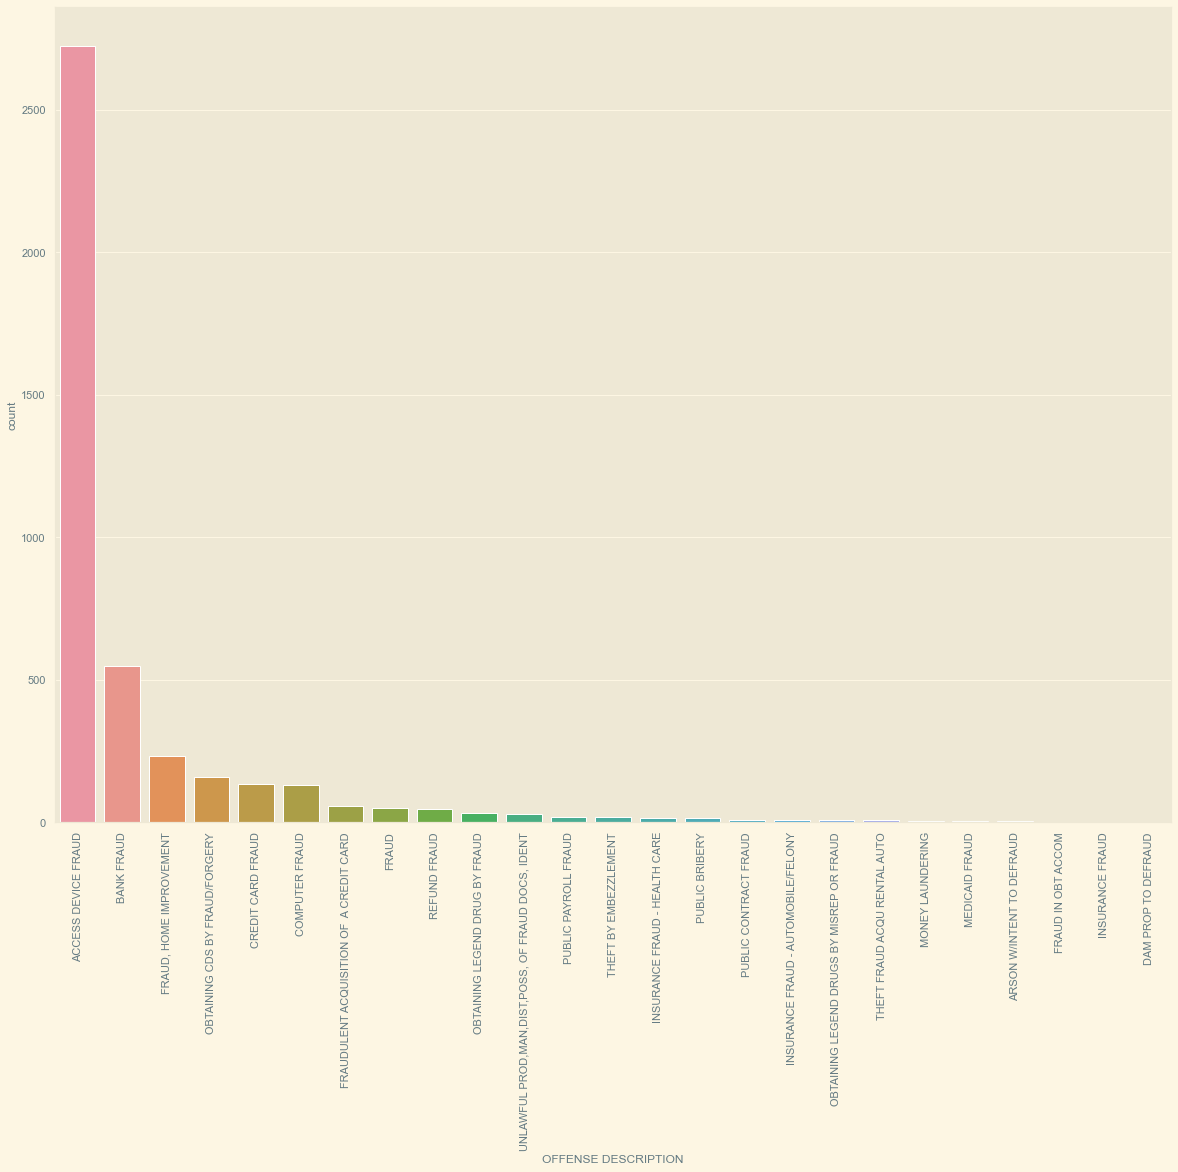

In [110]:
plt.figure(figsize = (20,15))
ax=sns.countplot(financial_crimes['OFFENSE DESCRIPTION'], order = financial_crimes['OFFENSE DESCRIPTION'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

### We observe that the most common financial crime was fraud. ACCESS DEVICE FRAUD being the highest followed by BANK FRAUD and HOME IMPROVEMENT FRAUD

# Relationship between financial crimes and date/time

Financial Crimes over the weekdays: 3667
Financial crimes over the weekends: 608

Percentage of weekend crimes: 14.222222222222221


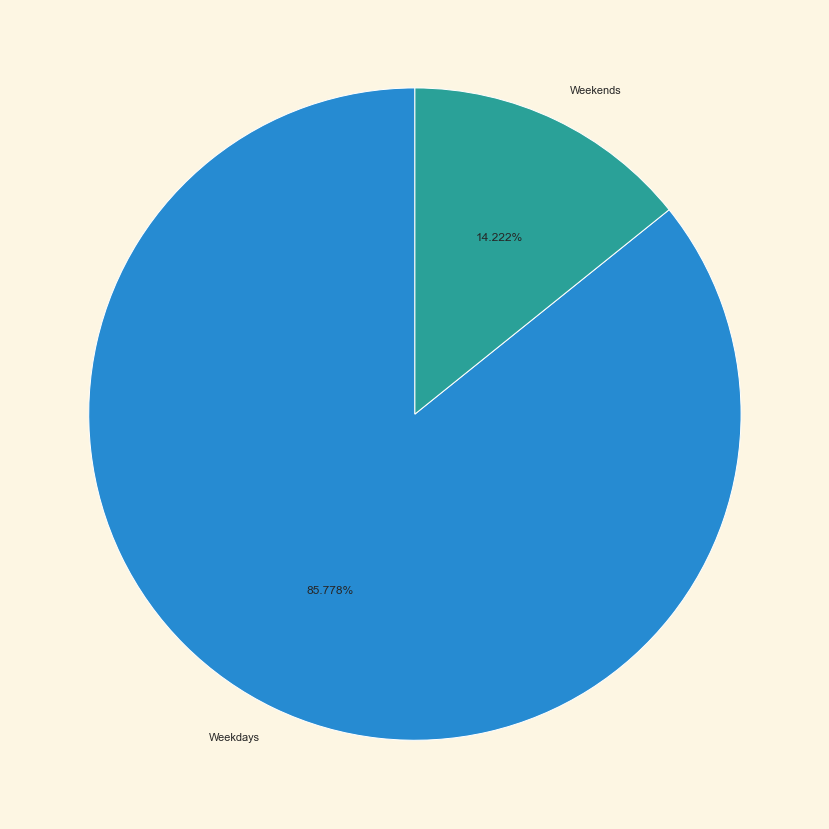

In [112]:
# weekday crimes
weekday_crimes = financial_crimes['Weekend'].value_counts()[0]
print('Financial Crimes over the weekdays: {}'.format(weekday_crimes))

# weekend crimes
weekend_crimes = financial_crimes['Weekend'].value_counts()[1]
print('Financial crimes over the weekends: {}'.format(weekend_crimes))

# percentage of weekend crimes
percentage = (100 * weekend_crimes) / (weekend_crimes + weekday_crimes)
print('\nPercentage of weekend crimes: {}'.format(percentage))

#visualization
plt.pie([weekday_crimes, weekend_crimes], labels = ['Weekdays', 'Weekends'], autopct='%.3f%%',startangle = 90)
plt.show()

### About 14 % crimes occurred over the weekend and 87 % over the weekdays.

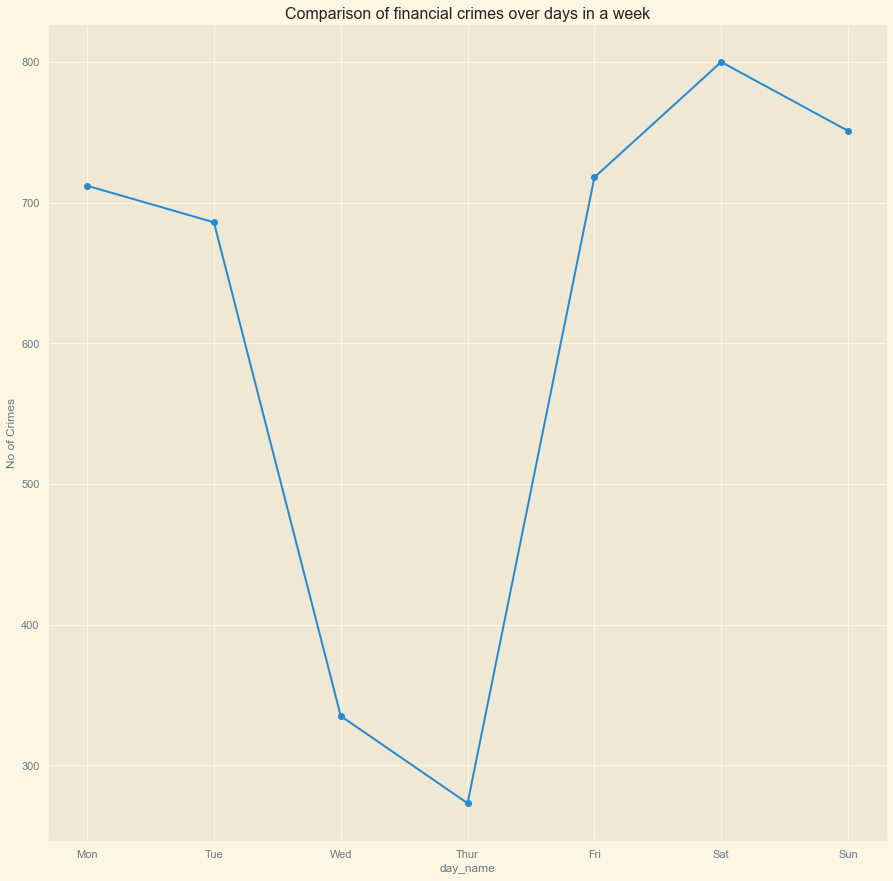

In [115]:
days = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
financial_crimes.groupby('day_name')['ID'].count().plot(marker='o',label='Crimes')
plt.xticks(np.arange(7),days)
plt.ylabel('No of Crimes')
plt.title("Comparison of financial crimes over days in a week")
plt.show()

### Highest number of financial crimes occurred on Saturday followed by Sunday.

2011    62923
2012    56365
2013    51136
2014    47514
2015    48446
2016    46006
2017    49777
2018    45870
2019    43525
2020    38946
Name: year, dtype: int64


<AxesSubplot:title={'center':'Crime over the years'}>

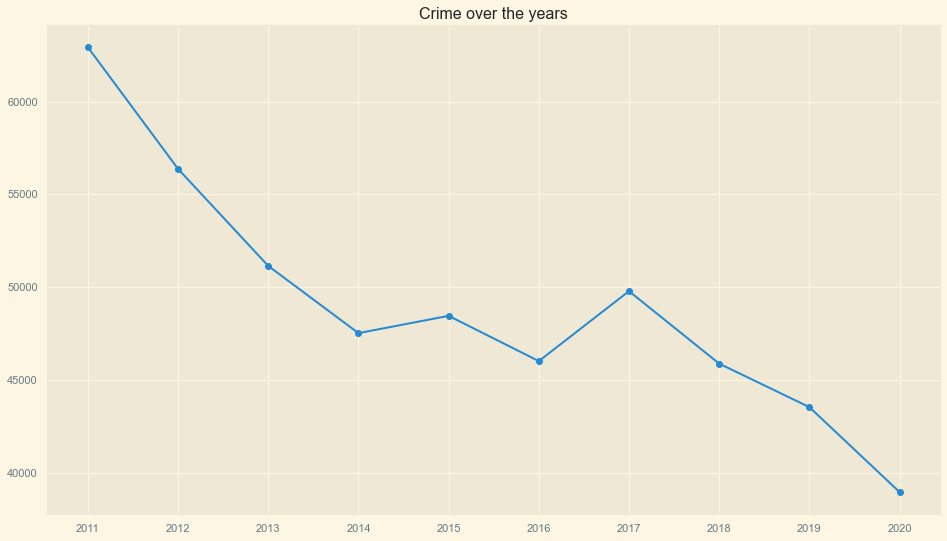

In [120]:
# Getting the crimes for each year
crimes_by_years = df['year'].value_counts()
crimes_by_years.sort_index(ascending = True, inplace = True)

#dropping crimes occurred in 2021
crimes_by_years.drop(2021, inplace = True)

print(crimes_by_years)


years = [y for y in range(2011, 2021)]


# Visualizing the trend
crimes_by_years.plot(x = 'Year', y = 'Crime Count', title = 'Crime over the years', kind = 'line', figsize = (16, 9), xticks= years, marker = 'o')

### Visualization of results is only done till the year 2020 as 2021 is still in progress. As the data for year 2021 is incomplete we would get biased results for this year.
### The highest number of crimes was reported in 2011. Since then, crime decreased every year till 2014. In the year 2017, the crimes increased again and later they decreased till 2020.

## Financial crimes by region

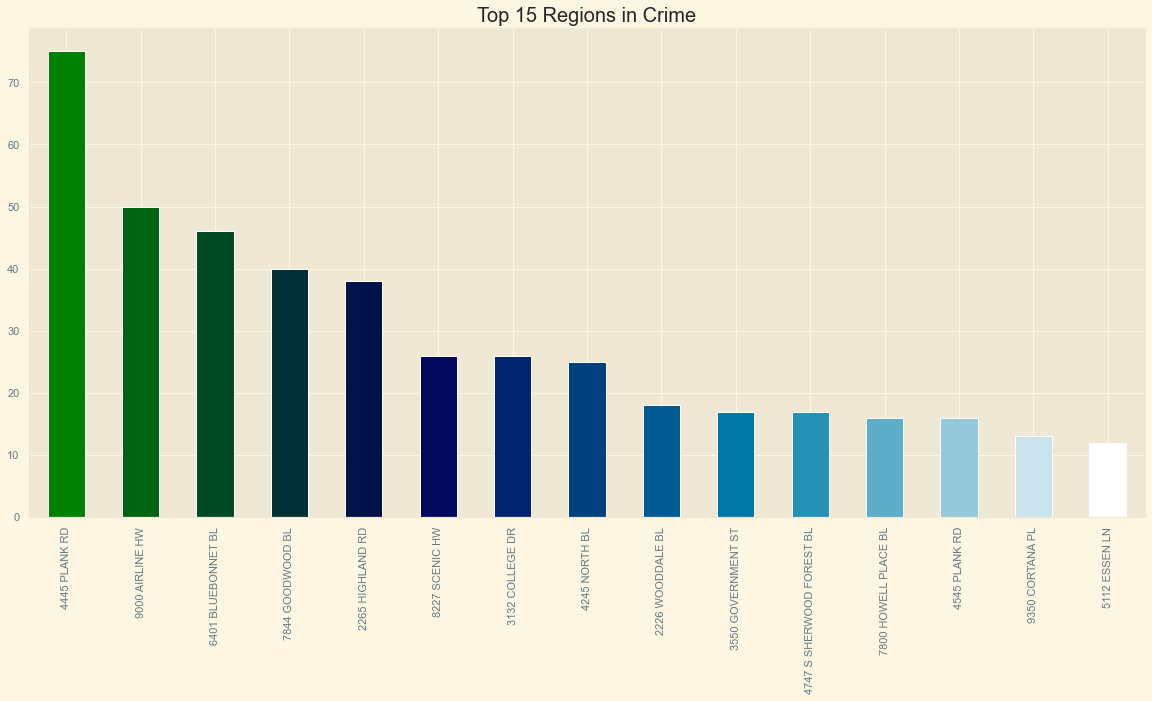

In [124]:
# Regions with count of crimes

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('Solarize_Light2')

color = plt.cm.ocean(np.linspace(0, 1, 15))
financial_crimes['FULL ADDRESS'].value_counts().head(15).plot.bar(color = color)

plt.title('Top 15 Regions in Crime',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

### The authorities should focus on these areas to stop future frauds.

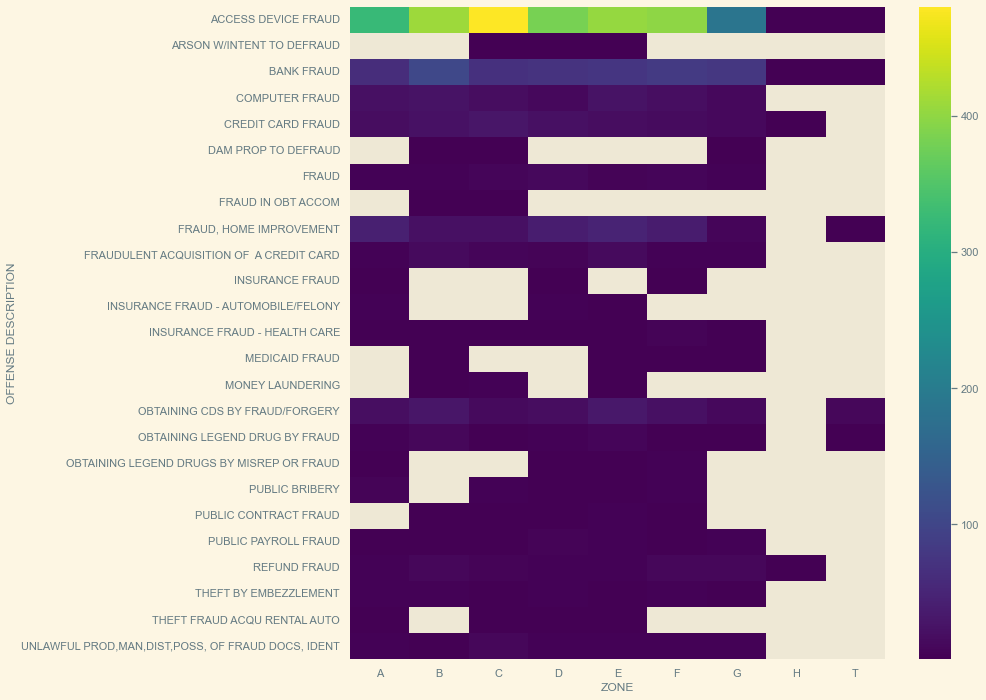

In [123]:
# grouping by crime type and zone
crimes_by_type_and_zone = financial_crimes.groupby( ['OFFENSE DESCRIPTION', 'ZONE'] )
crimes_by_type_and_zone = crimes_by_type_and_zone.count()['ID']

temp = crimes_by_type_and_zone.unstack(level = -1)

# visualization
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(temp, cmap="viridis")

### We observe that access device fraud is the most common crime across all the wards. The zone C has the highest number of thefts as indicated by the yellow cell of the heatmap. Other common crimes across all the wards are bank fraud,credit card, home improvement, obtaining cds by fraud and other offense.



In [1]:
!jupyter nbconvert --to webpdf --allow-chromium-download Baton_Rouge_Crime_EDA.ipynb

[NbConvertApp] Converting notebook Baton_Rouge_Crime_EDA.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1188109 bytes to Baton_Rouge_Crime_EDA.pdf
